### Visualization

Python has lots of different packages for making plots. Here are a few of the most popular:

* [Matplotlib](http://matplotlib.org/) ([tutorial](http://matplotlib.org/users/pyplot_tutorial.html))
    * [Pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
    * [Seaborn](http://seaborn.pydata.org/)
    * [ggplot](http://ggplot.yhathq.com/)
* [Altair](https://altair-viz.github.io/)
* [Bokeh](http://bokeh.pydata.org/en/latest/)
* ...

This blog post has examples comparing several of these packages: [A Dramatic Tour through Python's Data Visualization Landscape](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

Matplotlib is flexible but not concise. Pandas, Seaborn, and ggplot are more convenient for exploratory data analysis. Since all 3 are based on Matplotlib, you can still use Matplotlib to customize or put finishing touches on the plots they produce.

Below are 3 examples of how to make faceted plots with Matplotlib, Pandas, and Seaborn.

In [55]:
# more plots: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
#figmap = img.imread("fig_map.png")
#plt.axis('off')
#plt.imshow(figmap)

#fig (a Figure class instance) can have multiple Axes 

![asd](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

In [4]:
import pandas as pd

diamonds = pd.read_csv("../data/diamonds.csv")
print(diamonds.dtypes)
diamonds.head()

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Scatterplots

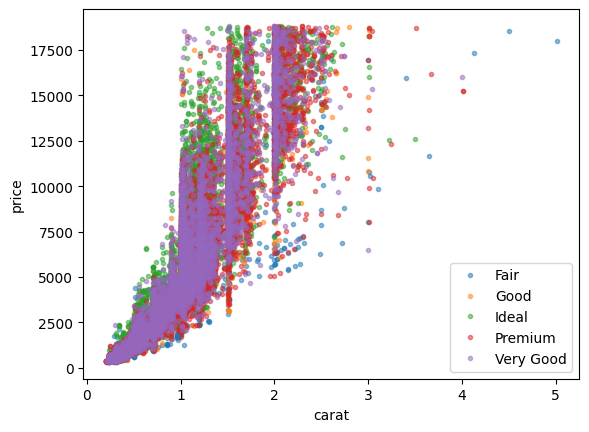

In [5]:
# Matplotlib

#Having fig is useful if you want to change figure-level attributes or save the figure as an image file later 
fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(group["carat"], group["price"], ".", label = group.name,alpha = 0.5)
    
diamonds.groupby("cut").apply(scatter)
ax.set(xlabel = "carat", ylabel = "price")
ax.legend(loc = 4)

plt.show()

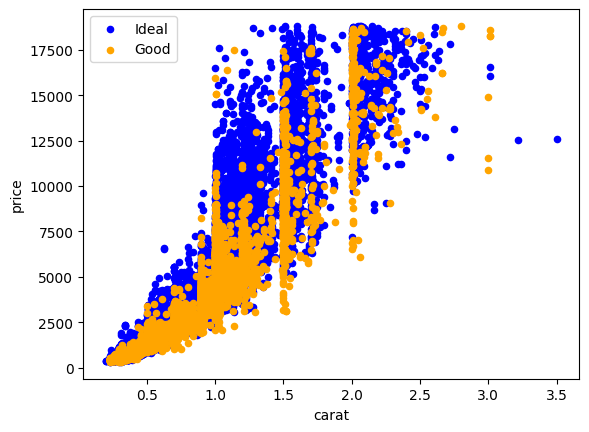

In [6]:
# Pandas
ax = diamonds[diamonds.cut == "Ideal"].plot.scatter("carat", "price", color = "Blue")

diamonds[diamonds.cut == "Good"].plot.scatter("carat", "price", color = "Orange", ax = ax)

# ...
ax.legend(['Ideal','Good'])

plt.show()

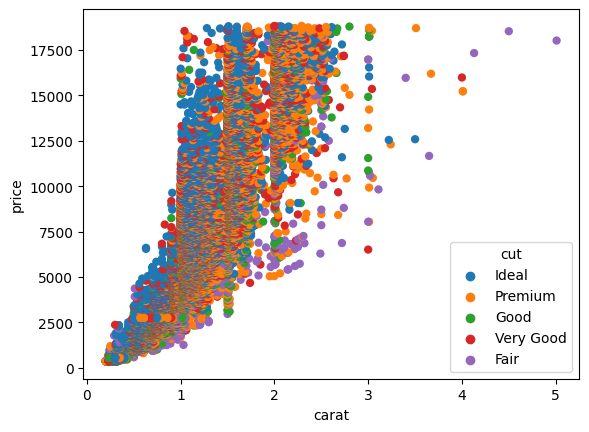

In [7]:
# Seaborn
import seaborn as sns
sns.scatterplot(x = "carat",y = "price",data =diamonds, hue = "cut" ,linewidth=0)
plt.show()

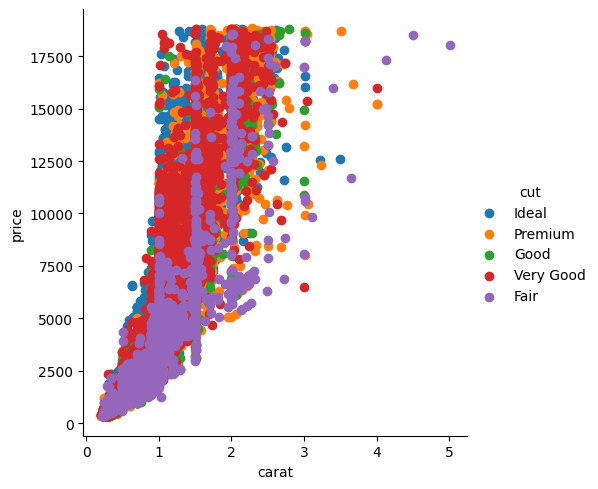

In [8]:
# Seaborn
facets = sns.FacetGrid(diamonds, hue = "cut",height = 5)
facets.map(plt.scatter, "carat", "price").add_legend()
plt.show()

### Boxplots

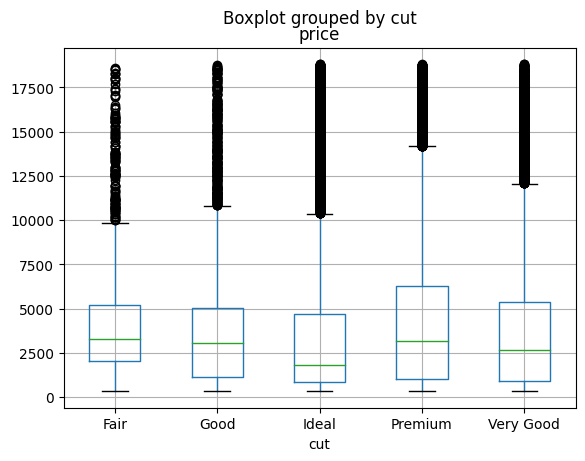

In [9]:
# Pandas

diamonds.boxplot("price", "cut")
plt.show()


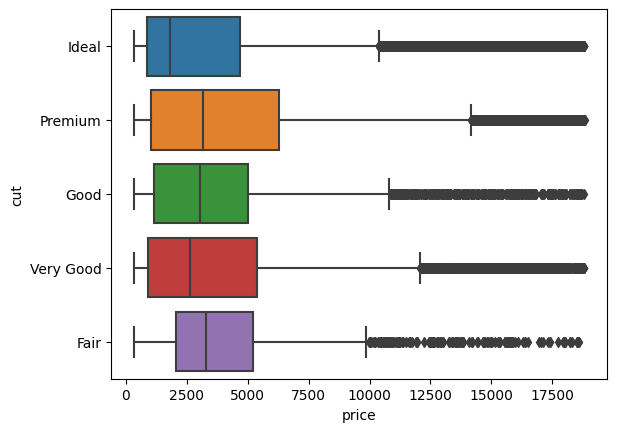

In [13]:
# Seaborn

sns.boxplot(x="price", y="cut", data = diamonds)
plt.show()

### Barplots

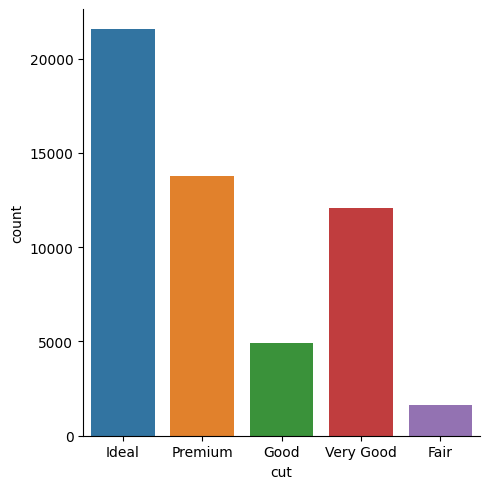

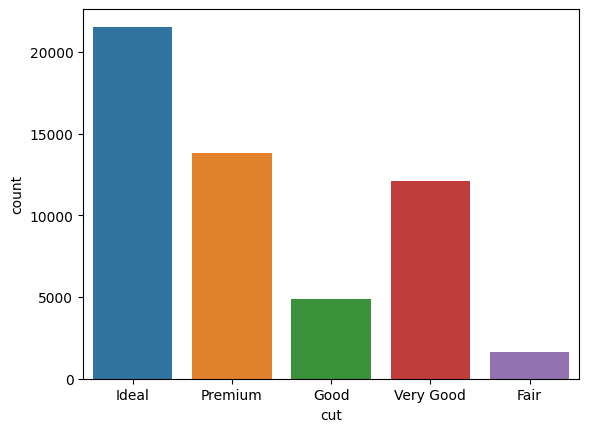

In [16]:
# Seaborn
sns.catplot(x="cut", data = diamonds, kind = "count")
plt.show()
sns.countplot(x="cut", data = diamonds)
plt.show()


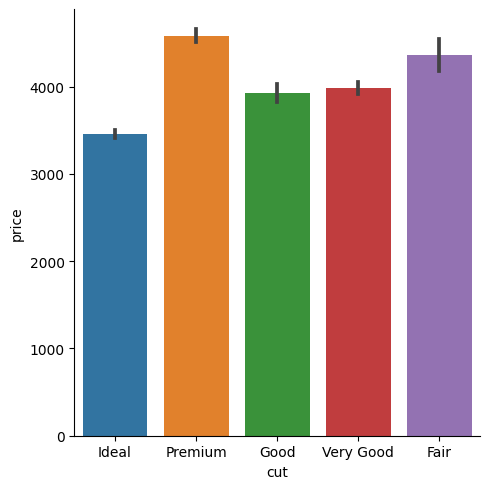

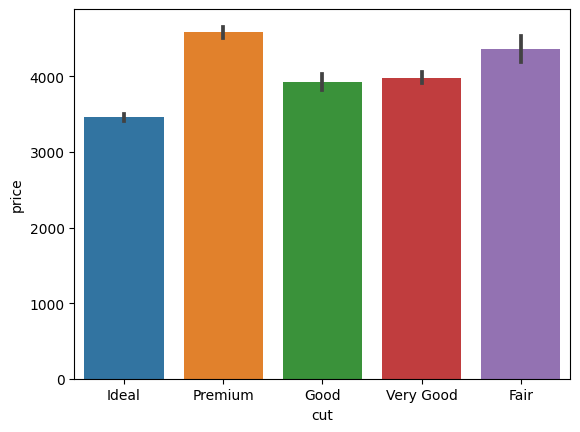

In [17]:
# Seaborn
#whiskers show the standard error of mean
sns.catplot(x="cut", y="price", data = diamonds, kind = "bar") # data is aggregated based on the mean
plt.show()
sns.barplot(x="cut", y="price", data = diamonds)
plt.show()

In [52]:
counts=diamonds.groupby("cut").size()

In [53]:
counts.index

Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object', name='cut')

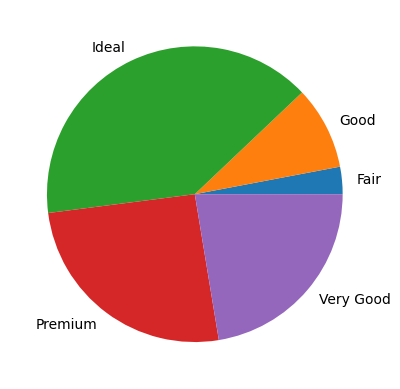

In [54]:
plt.pie(counts, labels = counts.index)
plt.show()

In [51]:
diamonds.groupby("cut").size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64